# Tiền xử lý dữ liệu
- Load dữ liệu từ CSV
- is null
- duplicate
- outlier
- formate code/ title


In [530]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [531]:
df = pd.read_csv("data/Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [532]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [533]:

df['Sleep Disorder'] = df['Sleep Disorder'].fillna("None")
df


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [534]:
df.duplicated().sum()

np.int64(0)

In [535]:
# Xóa dòng trùng nếu có
df = df.drop_duplicates()
df.shape


(374, 13)

In [536]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

df.head()


,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [537]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
numeric_cols


Index(['person_id', 'age', 'sleep_duration', 'quality_of_sleep',
       'physical_activity_level', 'stress_level', 'heart_rate', 'daily_steps'],
      dtype='object')

In [538]:
def detect_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((data < lower) | (data > upper)).sum()

In [539]:
outlier_counts = df[numeric_cols].apply(detect_outliers_IQR)
outlier_counts

person_id                   0
age                         0
sleep_duration              0
quality_of_sleep            0
physical_activity_level     0
stress_level                0
heart_rate                 15
daily_steps                 0
dtype: int64

In [540]:
def remove_outliers_IQR(dataframe, columns):
    df_clean = dataframe.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

df_no_outlier = remove_outliers_IQR(df, numeric_cols)

df_no_outlier.shape


(359, 13)

# Phân tích mối quan hệ của các thuộc tính
- heatmap
- biểu đồ (cột/ đường/top 10) --> sau mỗi biểu đồ cần 1 kết luận

In [541]:

# Map các cột category
gender_map = {"Male": 0, "Female": 1}
sleep_disorder_map = {"None": 0, "Insomnia": 1, "Sleep Apnea": 2}


In [542]:
labels = df['occupation'].unique().tolist()
occupation_map = {v: i for i, v in enumerate(labels)}
occupation_map


{'Software Engineer': 0,
 'Doctor': 1,
 'Sales Representative': 2,
 'Teacher': 3,
 'Nurse': 4,
 'Engineer': 5,
 'Accountant': 6,
 'Scientist': 7,
 'Lawyer': 8,
 'Salesperson': 9,
 'Manager': 10}

In [543]:
labels = df['bmi_category'].unique().tolist()
bmi_map = {v: i for i, v in enumerate(labels)}
bmi_map

{'Overweight': 0, 'Normal': 1, 'Obese': 2}

In [544]:
# Tạo bản encode
df_encoded = df.copy()
df_encoded

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [545]:
# Tách huyết áp tâm thu và tâm trương bằng lambda
df_encoded["tam_thu"] = df_encoded["blood_pressure"].apply(lambda x: int(x.split('/')[0]))
df_encoded["tam_truong"] = df_encoded["blood_pressure"].apply(lambda x: int(x.split('/')[1]))

#Tách cho các nhóm còn lại
df_encoded["gender"] = df_encoded["gender"].map(gender_map)
df_encoded["occupation"] = df_encoded["occupation"].map(occupation_map)
df_encoded["bmi_category"] = df_encoded["bmi_category"].map(bmi_map)
df_encoded["sleep_disorder"] = df_encoded["sleep_disorder"].map(sleep_disorder_map)
df_encoded["MABP"] = df_encoded.apply(
    lambda row: (2 * row["tam_truong"] + row["tam_thu"]) / 3,
    axis=1
)



In [546]:
df_encoded = df_encoded.drop(df_encoded.columns[[9]], axis=1)
df_encoded

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,heart_rate,daily_steps,sleep_disorder,tam_thu,tam_truong,MABP
0,1,0,27,0,6.1,6,42,6,0,77,4200,0,126,83,97.333333
1,2,0,28,1,6.2,6,60,8,1,75,10000,0,125,80,95.000000
2,3,0,28,1,6.2,6,60,8,1,75,10000,0,125,80,95.000000
3,4,0,28,2,5.9,4,30,8,2,85,3000,2,140,90,106.666667
4,5,0,28,2,5.9,4,30,8,2,85,3000,2,140,90,106.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,59,4,8.1,9,75,3,0,68,7000,2,140,95,110.000000
370,371,1,59,4,8.0,9,75,3,0,68,7000,2,140,95,110.000000
371,372,1,59,4,8.1,9,75,3,0,68,7000,2,140,95,110.000000
372,373,1,59,4,8.1,9,75,3,0,68,7000,2,140,95,110.000000


In [547]:
corr_occupation_sleep = df_encoded["occupation"].corr(df_encoded["quality_of_sleep"])
corr_occupation_sleep

np.float64(0.14265376437790145)

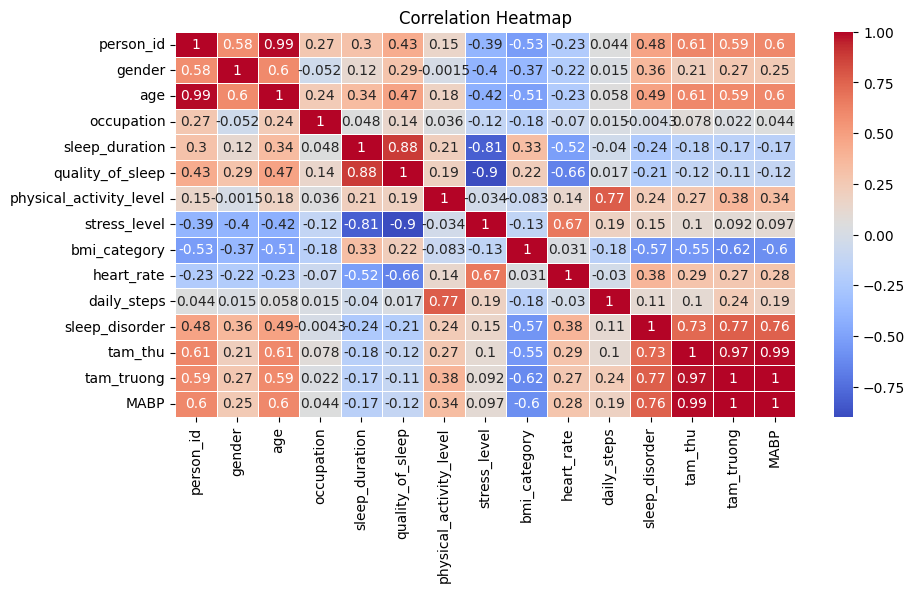

In [548]:
# Heatmap tương quan
plt.figure(figsize=(10,5))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Train - test - prediction
- Tạo mô hình
- Chia tập train - test
- Train (fit)
- Đánh giá mô hình với R^2 + MSE với tập test
- Dự đoán (có thể vẽ mô hình)


In [549]:
# Tạo mô hình
model = LinearRegression()


X= df_encoded[["sleep_duration","stress_level",  ]]
y = df_encoded.drop(columns=["quality_of_sleep"])

#Chia tập train : test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

#Khởi tạo và huấn luyện model
model.fit(X_test,y_test)

model


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [550]:
#Tạo dựng hồi quy (dự đoán)
y_pred = model.predict(X_test)

In [552]:
mse = mean_squared_error(y_true = y_test,y_pred= y_pred)
r2 = model.score(X_test, y_test)
r2_sklearn = r2_score(y_true = y_test, y_pred = y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 (from model.score): {r2:.4f}")
print(f"R2 (from r2_score): {r2_sklearn:.4f}")

Mean Squared Error: 361.6638
R^2 (from model.score): 0.7182
R2 (from r2_score): 0.7182


In [556]:
# Tạo DataFrame chứa giá trị thực tế và dự đoán
df_test = pd.DataFrame({
    'sleep_duration': X_test['sleep_duration'],
    'thoi_gian_ngu_thuc': y_test,
    'thoi_gian_ngu_du_doan': y_pred
})

# Sắp xếp theo giá trị sleep_duration để đường hồi quy mượt
df_test = df_test.sort_values(by='sleep_duration')

# Vẽ biểu đồ
plt.figure(figsleep_duration=(8, 6))
sns.scatterplot(
    x='sleep_duration', y='Thời gian ngủ thực tế',
    data=df_test, color='pink', label='Thời gian ngủ'
)
plt.plot(
    df_test['sleep_duration'], df_test['Thời gian ngủ dự đoán'],
    color='purple', linewidth=2, label='Đường hồi quy tuyến tính'
)
plt.title('Mối quan hệ giữa thời gian ngủ và chất lượng giấc ngủ')
plt.xlabel('Tiếng')
plt.ylabel('Sao / 10')
plt.legend()
plt.show()

TypeError: 'DataFrame' object is not callable